#eddataPredict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
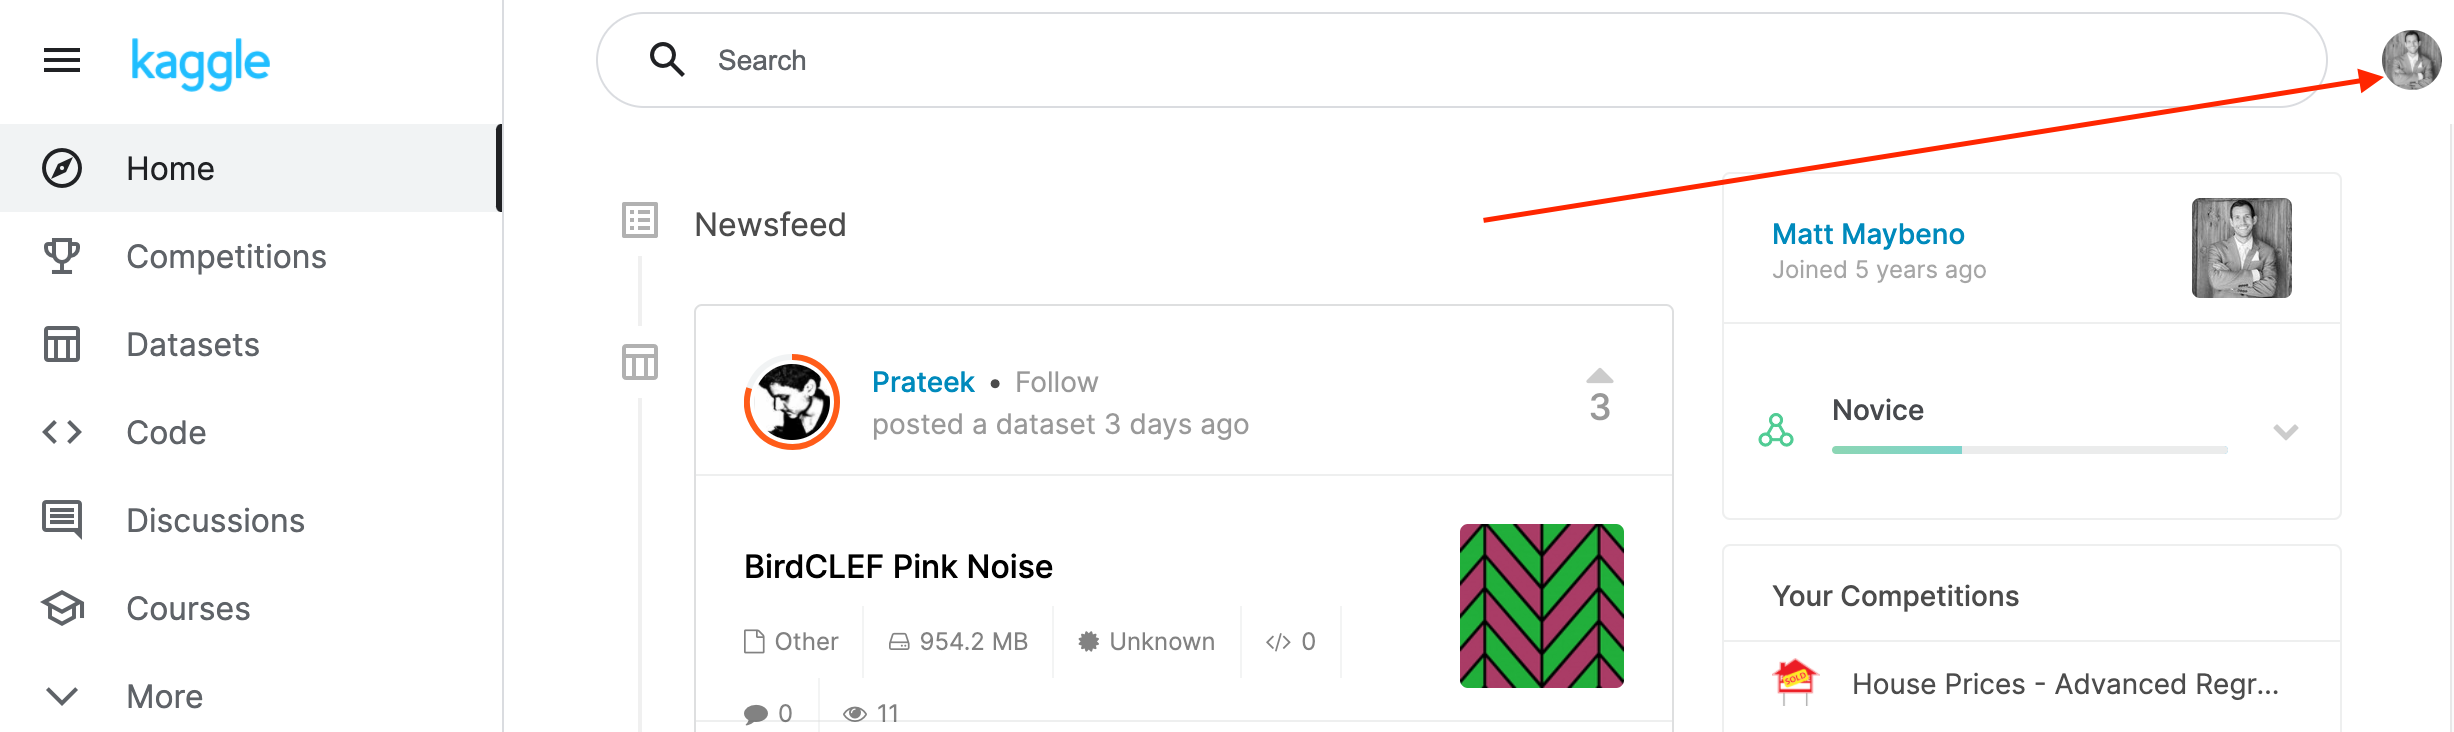
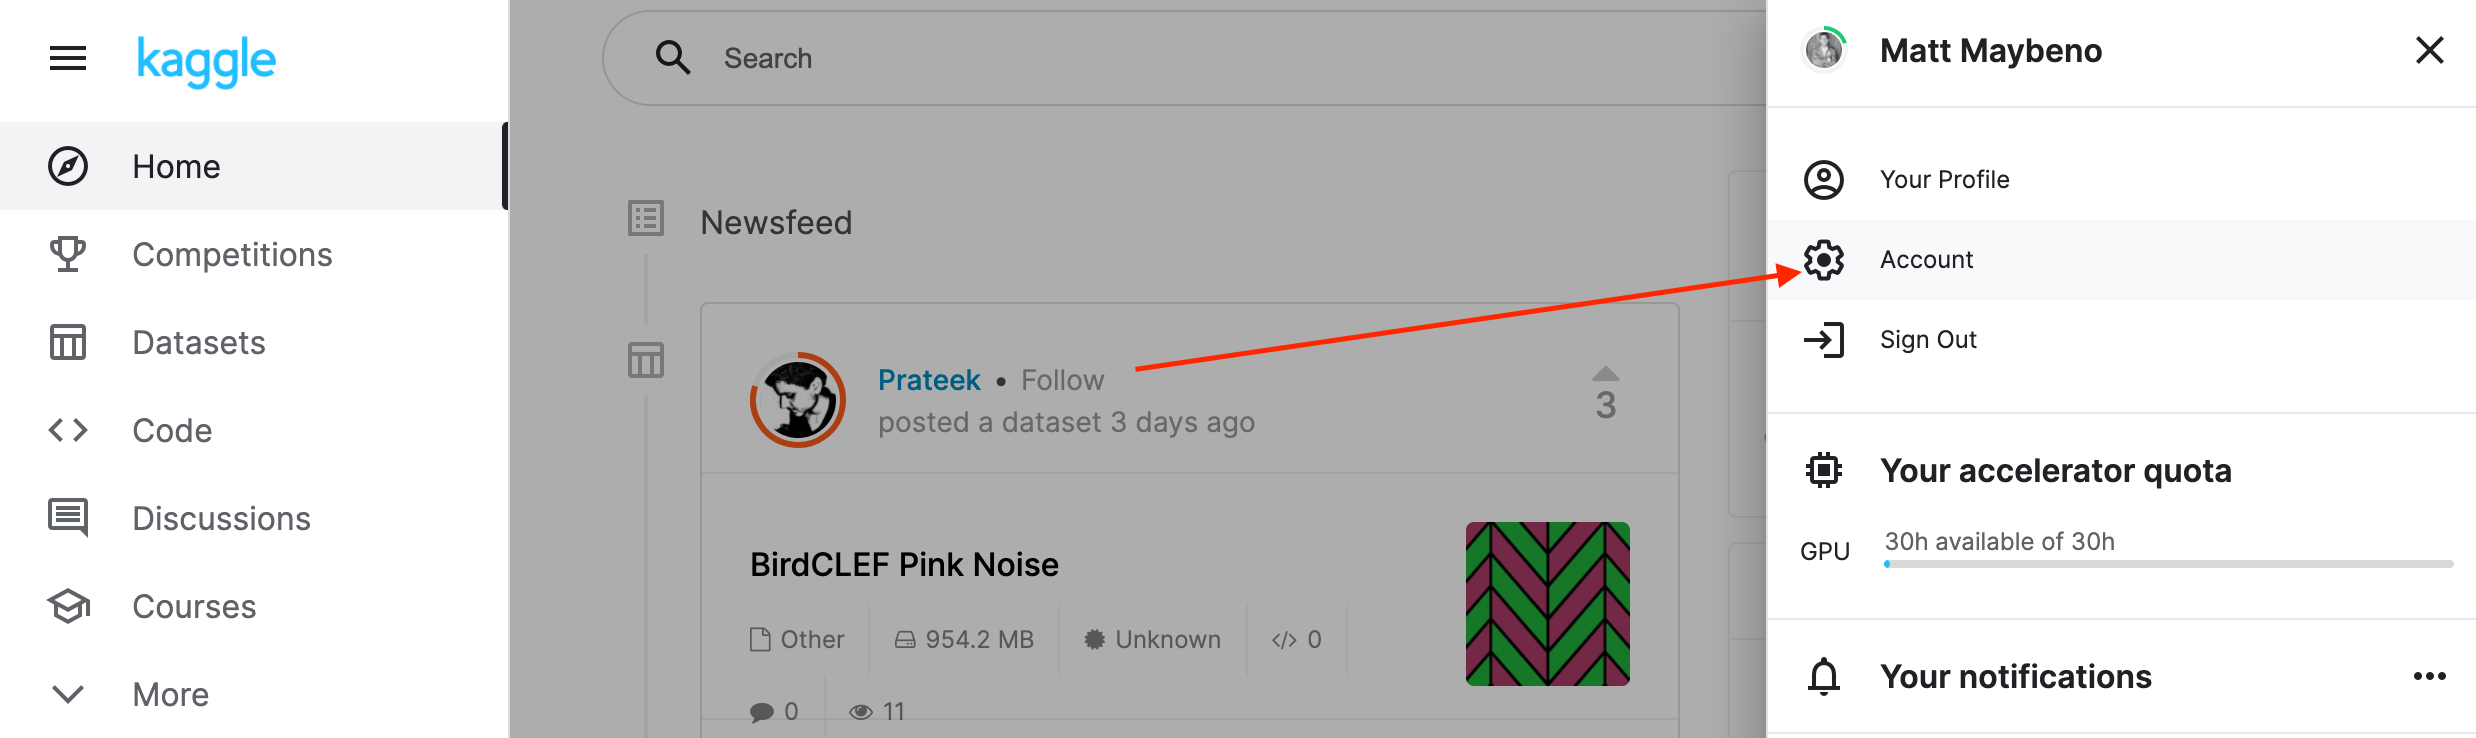
2. Scroll down to API and click Create New API Token.
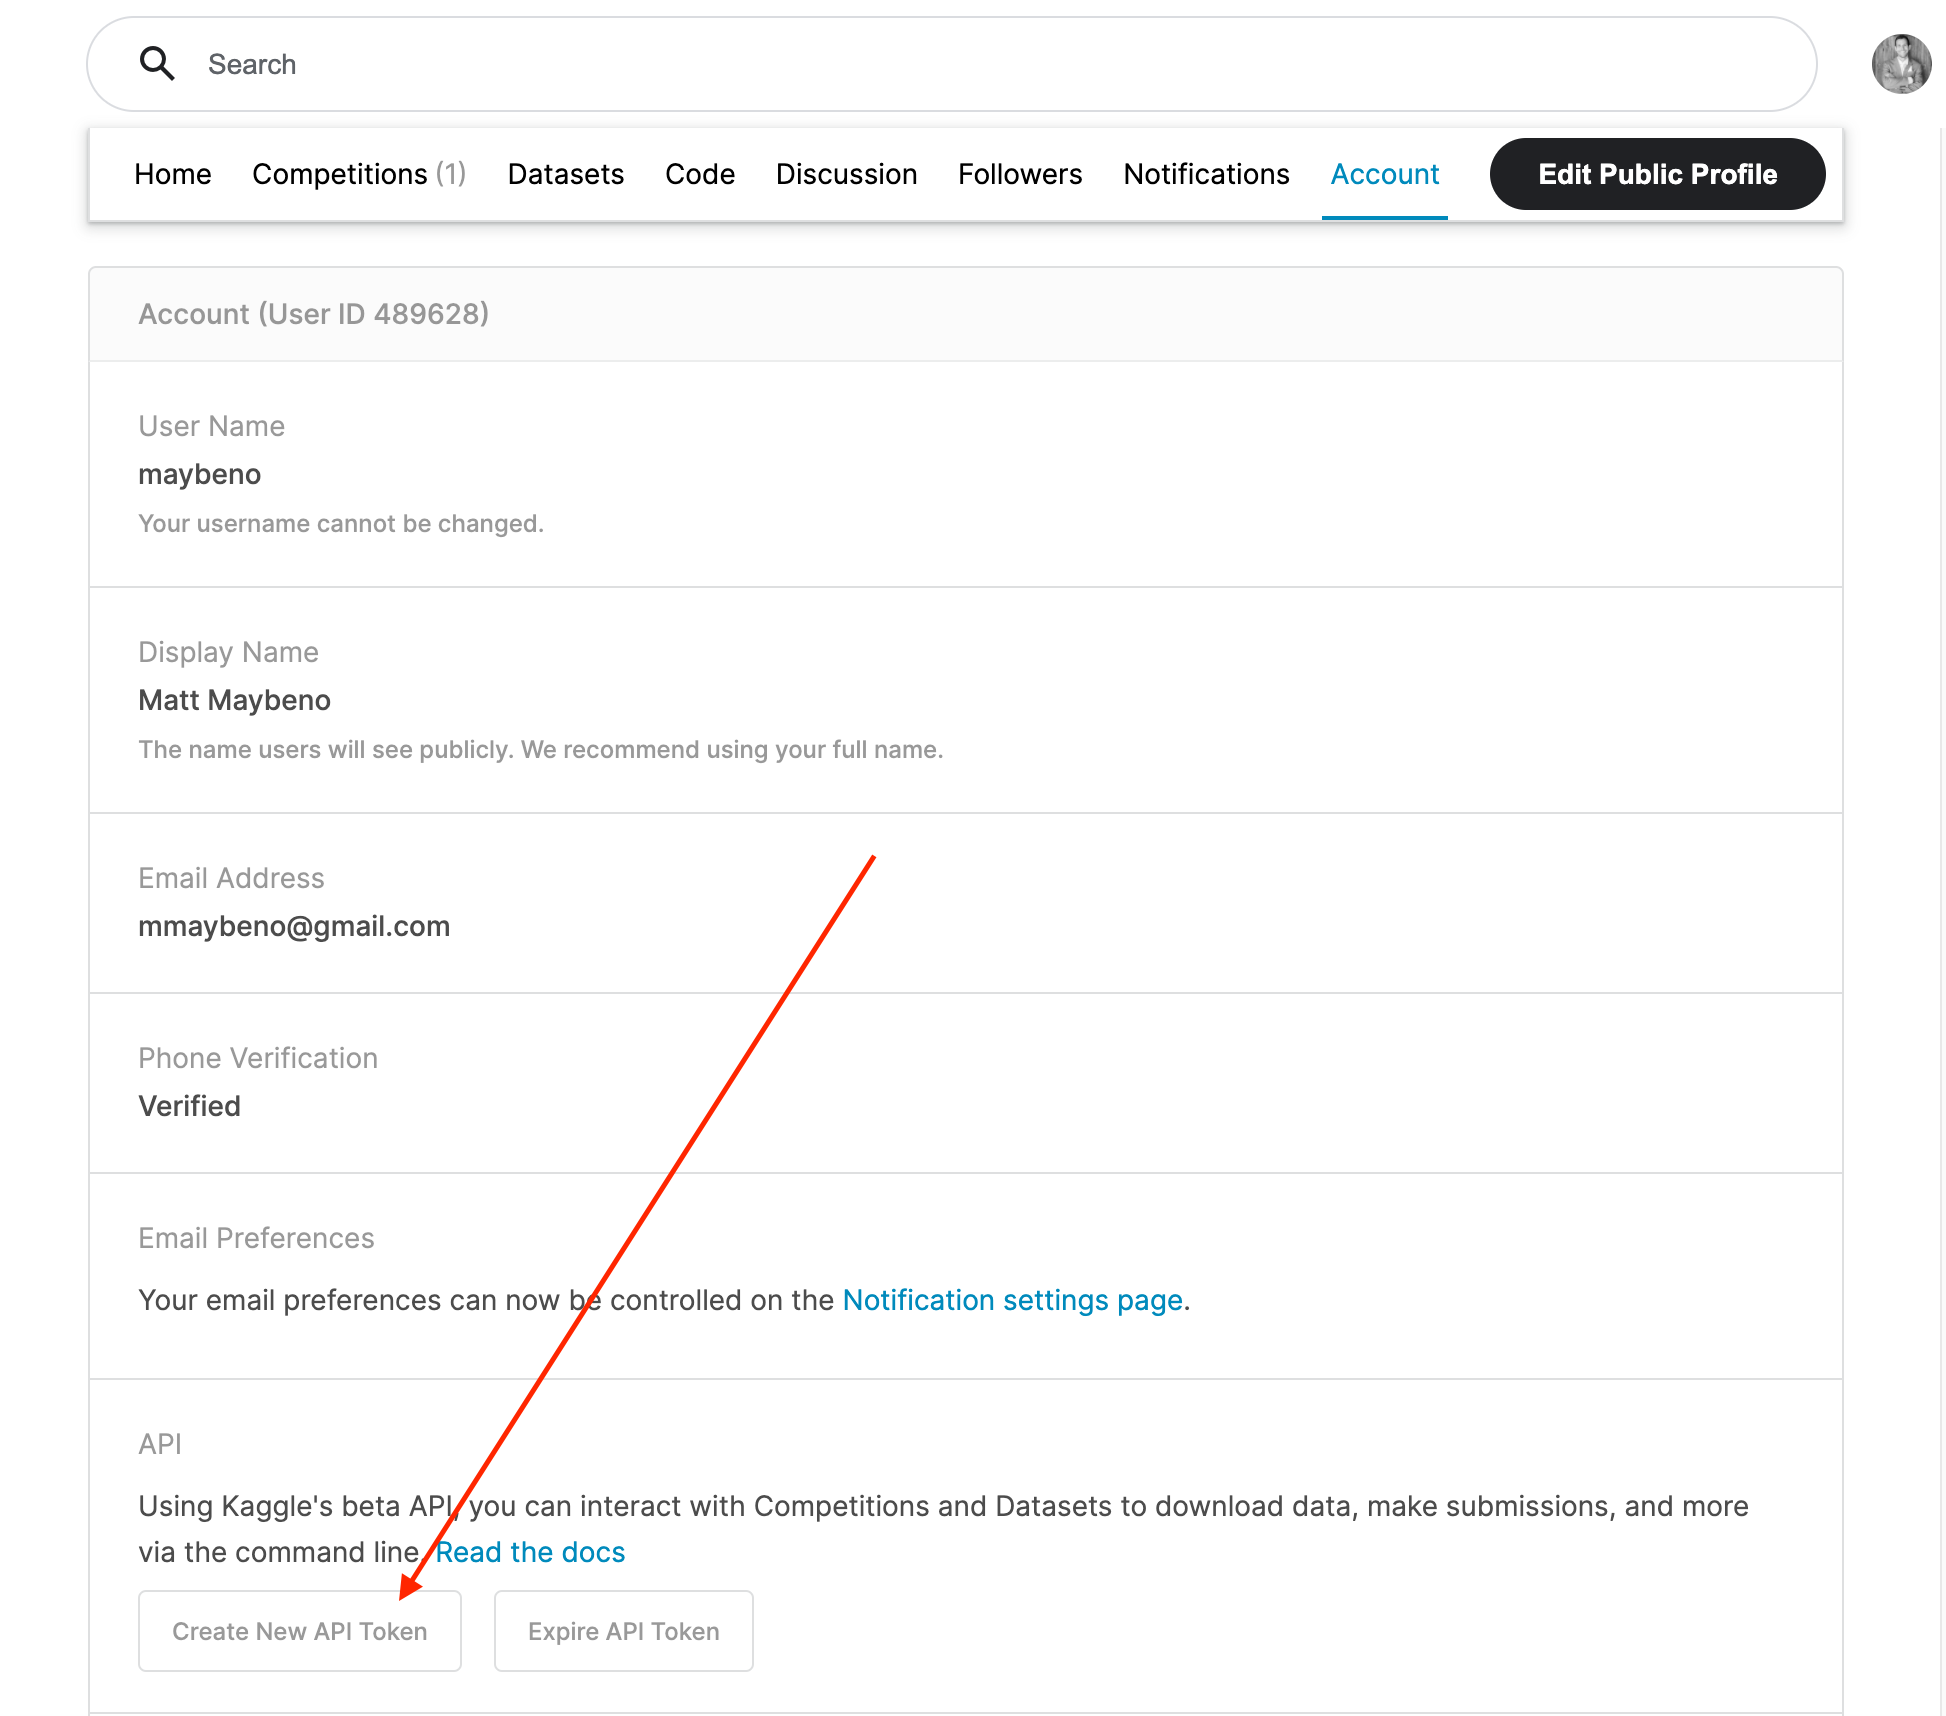
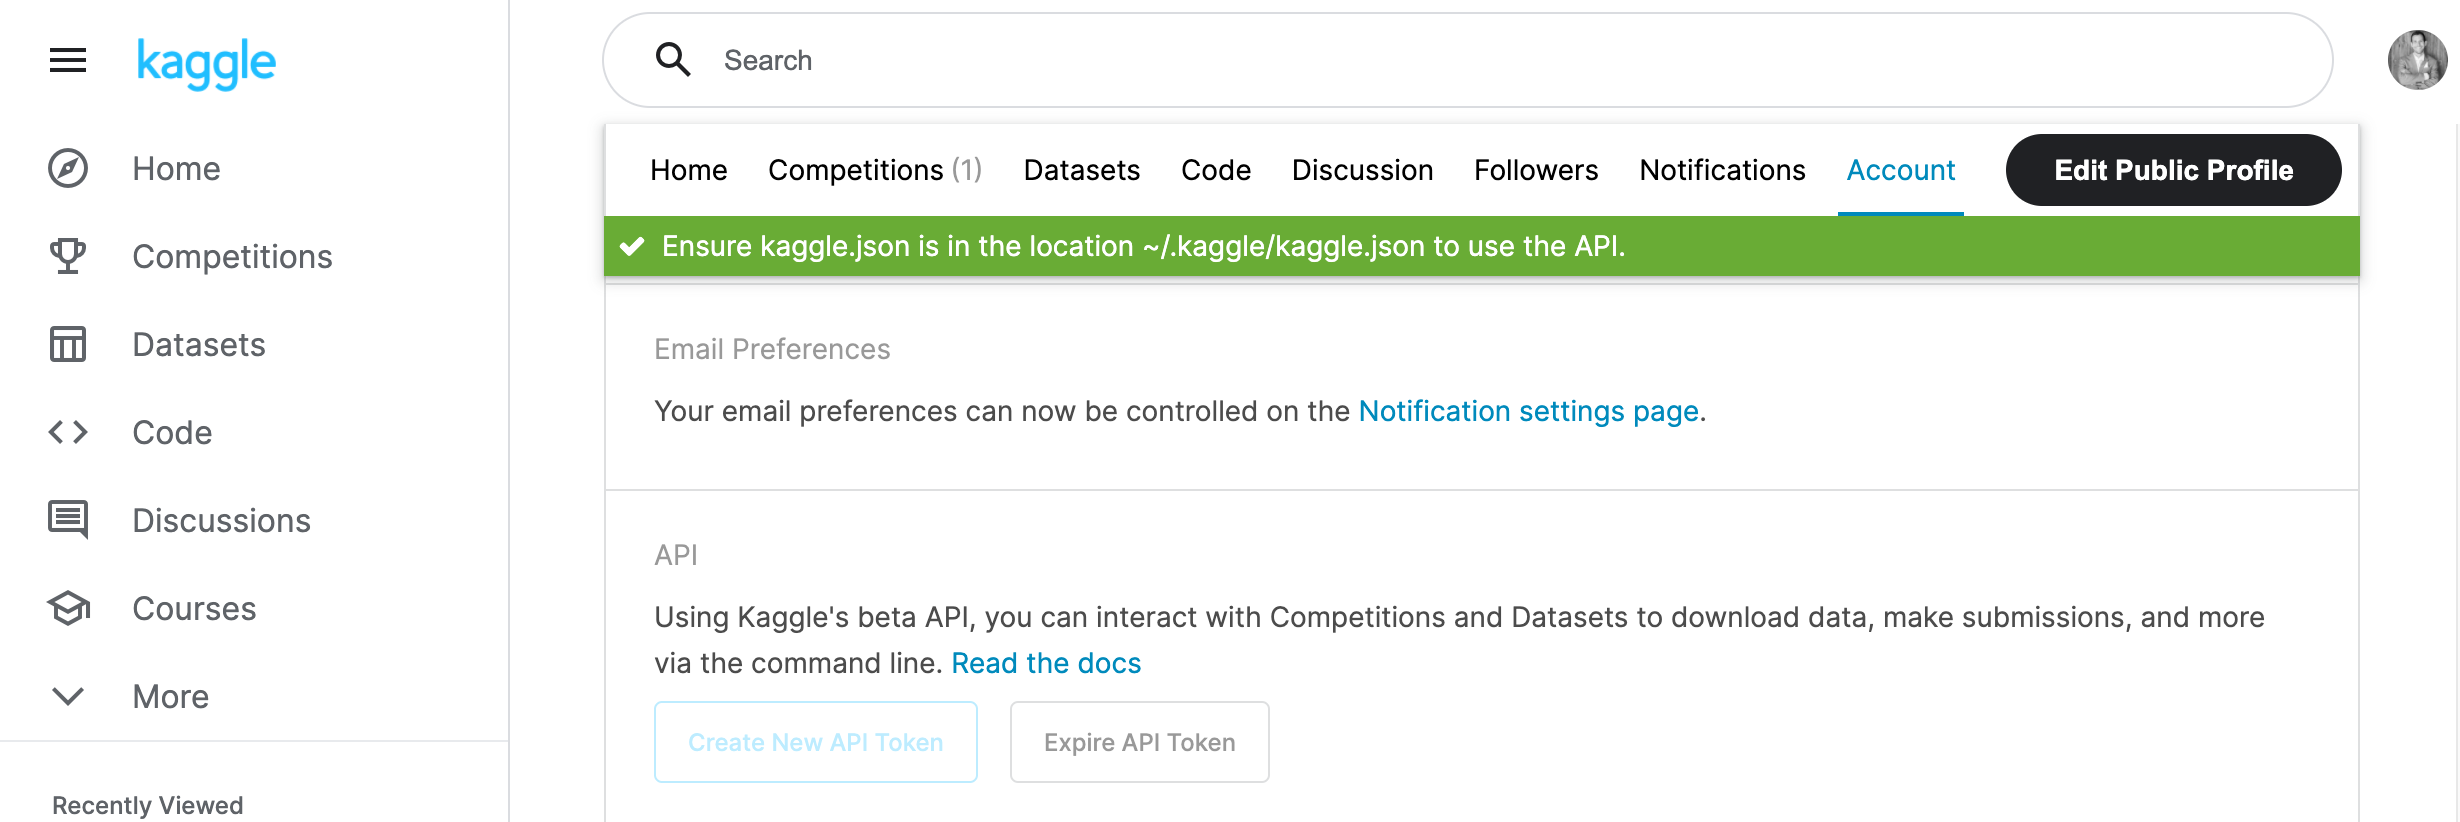
3. Open up `kaggle.json` and use the username and key.
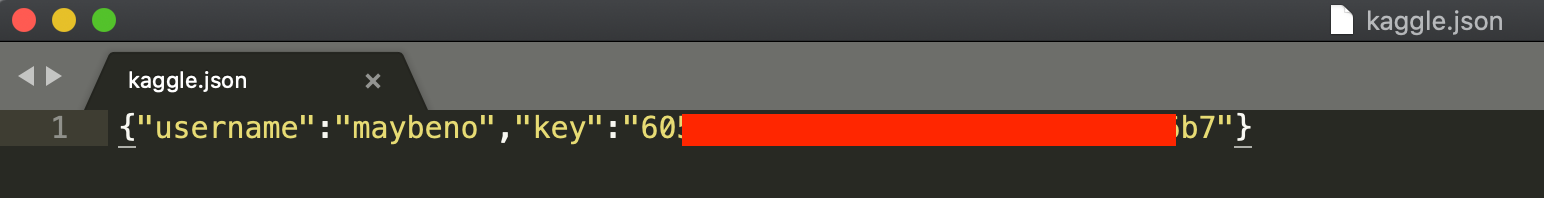

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install kaggle

  Using cached kaggle-1.6.12-py3-none-any.whl


In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 15.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 M

### Setup Kaggle API Key

In [2]:
import os
import json

# Path where the kaggle.json will be stored
kaggle_path = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_path, exist_ok=True)  # Ensure the directory exists

kaggle_file_path = os.path.join(kaggle_path, "kaggle.json")

# Create an empty kaggle.json file and set permissions
with open(kaggle_file_path, 'w') as file:
    pass
os.chmod(kaggle_file_path, 0o600)  # Set permissions to read/write by the current user only

# Fill in your username and key from creating the kaggle account and API token file
kaggle_username = "bazizmeriem"
kaggle_key = "5074ee07d75a35aa44466c4a37422404"

# Save API token to the kaggle.json file
with open(kaggle_file_path, "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
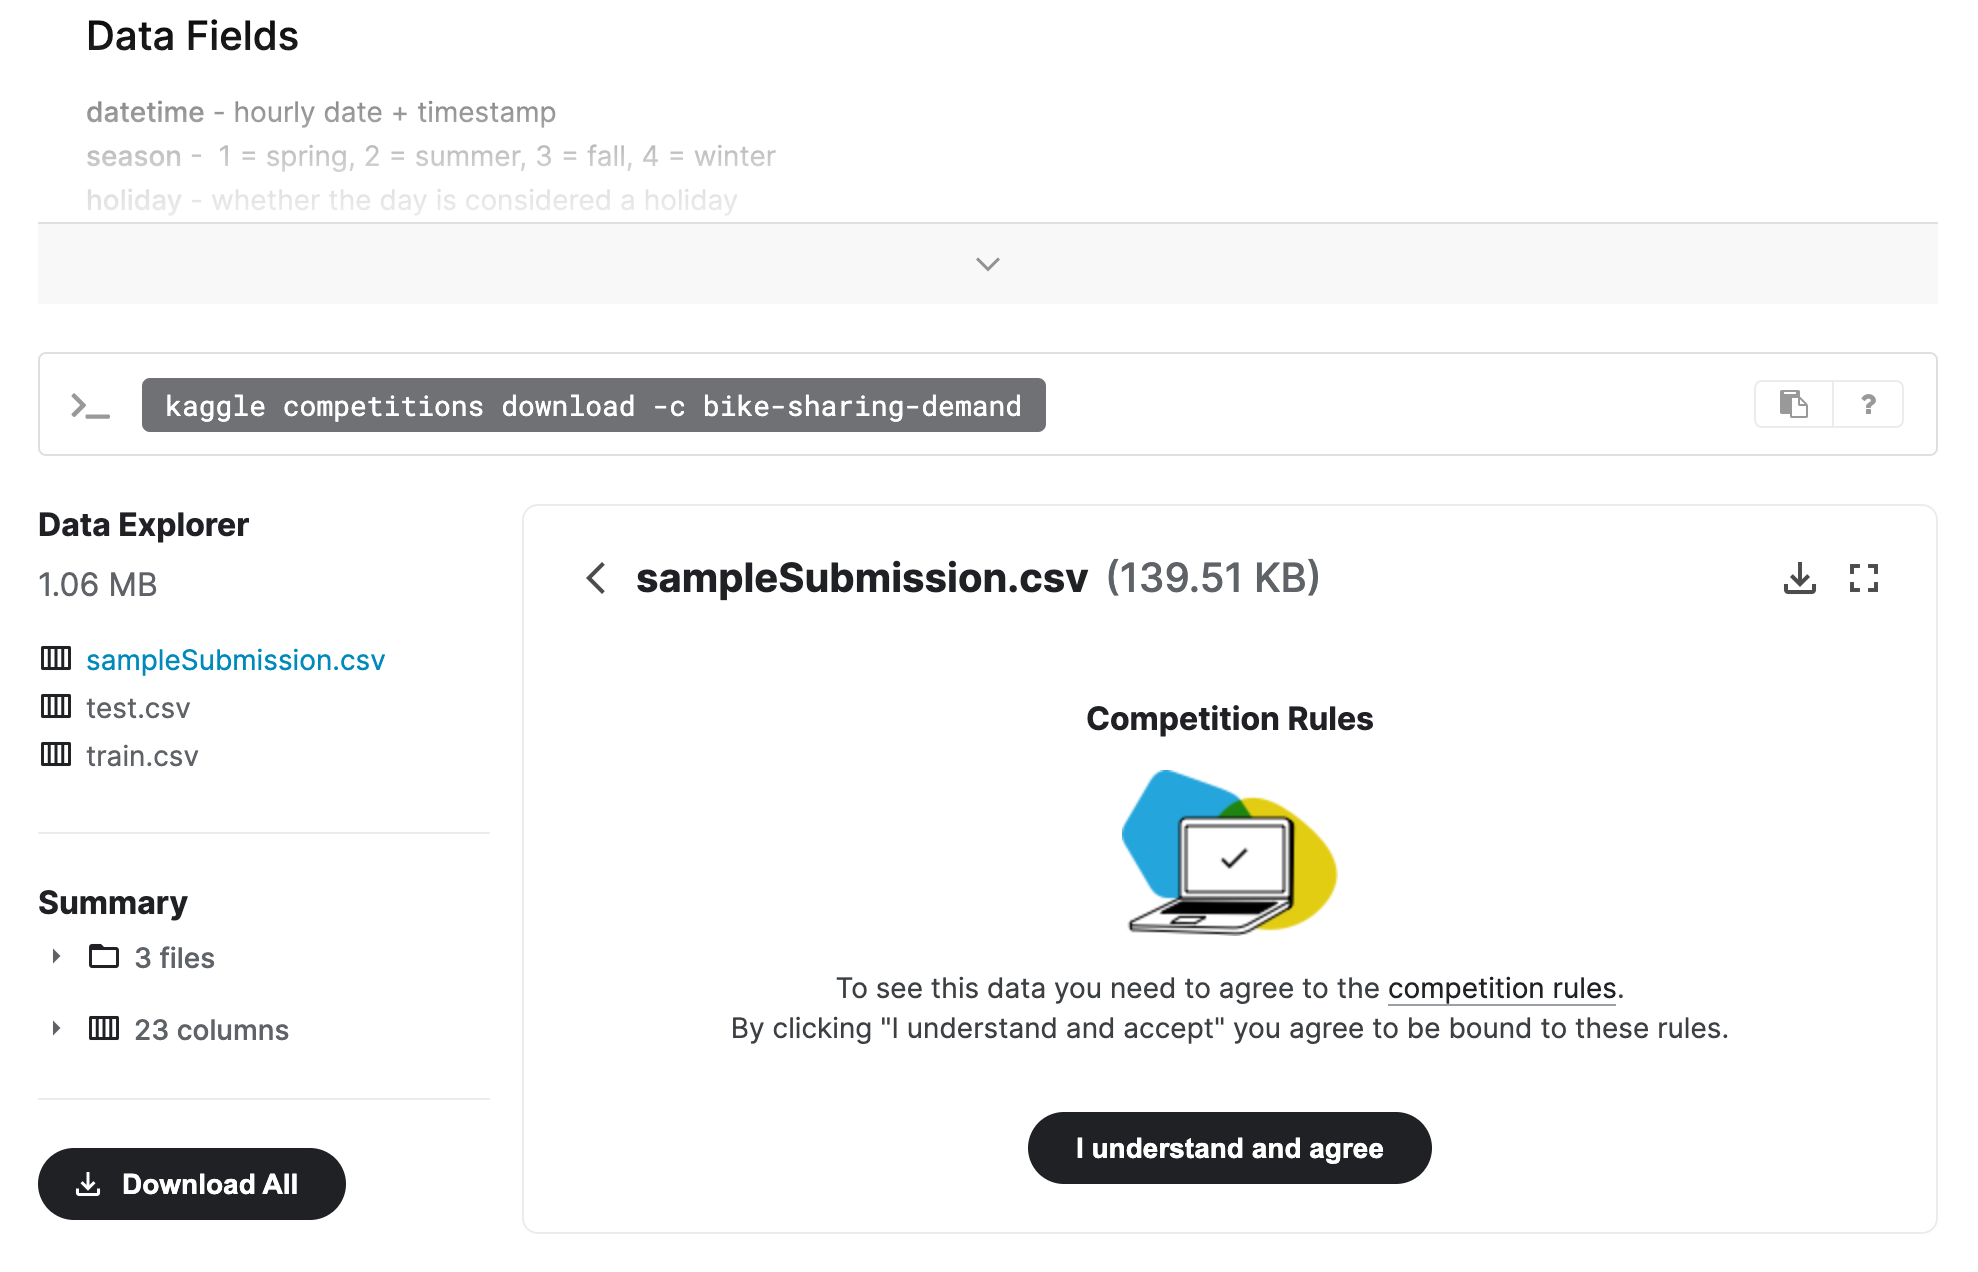

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 50.8MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('data/train.csv',parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('data/test.csv',parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv('data/sampleSubmission.csv',parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
# Initialize the TabularPredictor with the required parameters
predictor = TabularPredictor(label='count', learner_kwargs={"ignored_columns": ["casual", "registered"]},eval_metric='root_mean_squared_error')

# Fit the predictor to the training data with a time limit of 10 minutes (600 seconds)
predictor.fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240512_185649"
Presets specified: ['best_quality']
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240512_185649"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   22.62 GB / 32.20 GB (70.2%)
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/u

[1000]	valid_set's rmse: 131.684
[2000]	valid_set's rmse: 130.67
[3000]	valid_set's rmse: 130.626
[1000]	valid_set's rmse: 135.592
[1000]	valid_set's rmse: 133.481
[2000]	valid_set's rmse: 132.323
[3000]	valid_set's rmse: 131.618
[4000]	valid_set's rmse: 131.443
[5000]	valid_set's rmse: 131.265
[6000]	valid_set's rmse: 131.277
[7000]	valid_set's rmse: 131.443
[1000]	valid_set's rmse: 128.503
[2000]	valid_set's rmse: 127.654
[3000]	valid_set's rmse: 127.227
[4000]	valid_set's rmse: 127.105
[1000]	valid_set's rmse: 134.135
[2000]	valid_set's rmse: 132.272
[3000]	valid_set's rmse: 131.286
[4000]	valid_set's rmse: 130.752
[5000]	valid_set's rmse: 130.363
[6000]	valid_set's rmse: 130.509
[1000]	valid_set's rmse: 136.168
[2000]	valid_set's rmse: 135.138
[3000]	valid_set's rmse: 135.029
[1000]	valid_set's rmse: 134.061
[2000]	valid_set's rmse: 133.034
[3000]	valid_set's rmse: 132.182
[4000]	valid_set's rmse: 131.997
[5000]	valid_set's rmse: 131.643
[6000]	valid_set's rmse: 131.504
[7000]	vali

	-131.4609	 = Validation score   (-root_mean_squared_error)
	50.47s	 = Training   runtime
	7.52s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 334.91s of the 534.95s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 130.818
[1000]	valid_set's rmse: 133.204
[1000]	valid_set's rmse: 130.928
[1000]	valid_set's rmse: 126.846
[1000]	valid_set's rmse: 131.426
[1000]	valid_set's rmse: 133.655
[1000]	valid_set's rmse: 132.155
[1000]	valid_set's rmse: 130.62


	-131.0542	 = Validation score   (-root_mean_squared_error)
	15.62s	 = Training   runtime
	1.35s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 316.15s of the 516.19s of remaining time.
	-116.5484	 = Validation score   (-root_mean_squared_error)
	16.42s	 = Training   runtime
	0.78s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 298.4s of the 498.45s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 4493.
	Ran out of time, early stopping on iteration 4380.
	Ran out of time, early stopping on iteration 4496.
	Ran out of time, early stopping on iteration 4744.
	Ran out of time, early stopping on iteration 4715.
	-130.539	 = Validation score   (-root_mean_squared_error)
	236.74s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 61.42s of the 261.47

[1000]	valid_set's rmse: 60.7094
[2000]	valid_set's rmse: 59.5678
[1000]	valid_set's rmse: 60.5982
[2000]	valid_set's rmse: 59.6869
[1000]	valid_set's rmse: 63.2599
[2000]	valid_set's rmse: 62.0183
[1000]	valid_set's rmse: 63.5036
[2000]	valid_set's rmse: 61.8127
[1000]	valid_set's rmse: 58.1602
[2000]	valid_set's rmse: 56.9413
[1000]	valid_set's rmse: 64.3934
[2000]	valid_set's rmse: 63.3429
[1000]	valid_set's rmse: 63.4572
[2000]	valid_set's rmse: 62.4131
[3000]	valid_set's rmse: 62.0941
[4000]	valid_set's rmse: 61.9472
[1000]	valid_set's rmse: 57.7295
[2000]	valid_set's rmse: 56.8972


	-60.2666	 = Validation score   (-root_mean_squared_error)
	49.22s	 = Training   runtime
	3.89s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 142.25s of the 142.24s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-55.0454	 = Validation score   (-root_mean_squared_error)
	12.05s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 129.59s of the 129.57s of remaining time.
	-53.3222	 = Validation score   (-root_mean_squared_error)
	46.59s	 = Training   runtime
	0.64s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 81.98s of the 81.97s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1342.
	Ran out of time, early stopping on iteration 1152.
	Ran out of time, early stopping on iteration 1289.
	Ra

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.760495      12.516667  452.643220                0.001077           0.291672            3       True         16
1   RandomForestMSE_BAG_L2  -53.322242      11.481985  425.667741                0.635098          46.587595            2       True         13
2     ExtraTreesMSE_BAG_L2  -53.762551      11.632550  393.709115                0.785664          14.628969            2       True         15
3          LightGBM_BAG_L2  -55.045365      11.094828  391.134984                0.247942          12.054838            2       True         12
4          CatBoost_BAG_L2  -55.861982      10.928294  453.776136                0.081408          74.695990            2       True         14
5        LightGBMXT_BAG_L2  -60.266622      14.738580  428.299883         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_

### Create predictions from test dataset

In [14]:
predictions = predictor.predict(test)
predictions.head()

0    23.596939
1    42.024296
2    46.721924
3    48.883747
4    52.115498
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.735405
std        90.199341
min         3.013373
25%        21.164433
50%        62.319099
75%       171.738556
max       361.534912
Name: count, dtype: float64

In [16]:
# How many negative values do we have?
neg_val_num = (predictions<0).sum()

In [17]:
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [20]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [23]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "raw_submission1_12-05-2024"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 466kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [24]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------  --------  -----------  ------------  
submission.csv               2024-05-12 19:09:07  raw_submission1_12-05-2024                 complete  1.80721      1.80721       
submission_new_hpo.csv       2024-05-12 16:28:50  new features with hyperparameters          complete  1.80274      1.80274       
submission_new_hpo.csv       2024-05-12 16:18:23  new features with hyperparameters          complete  1.80274      1.80274       
submission_new_hpo.csv       2024-05-12 15:36:34  new features with hyperparameters          complete  1.80274      1.80274       


#### Initial score of `1.80274`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

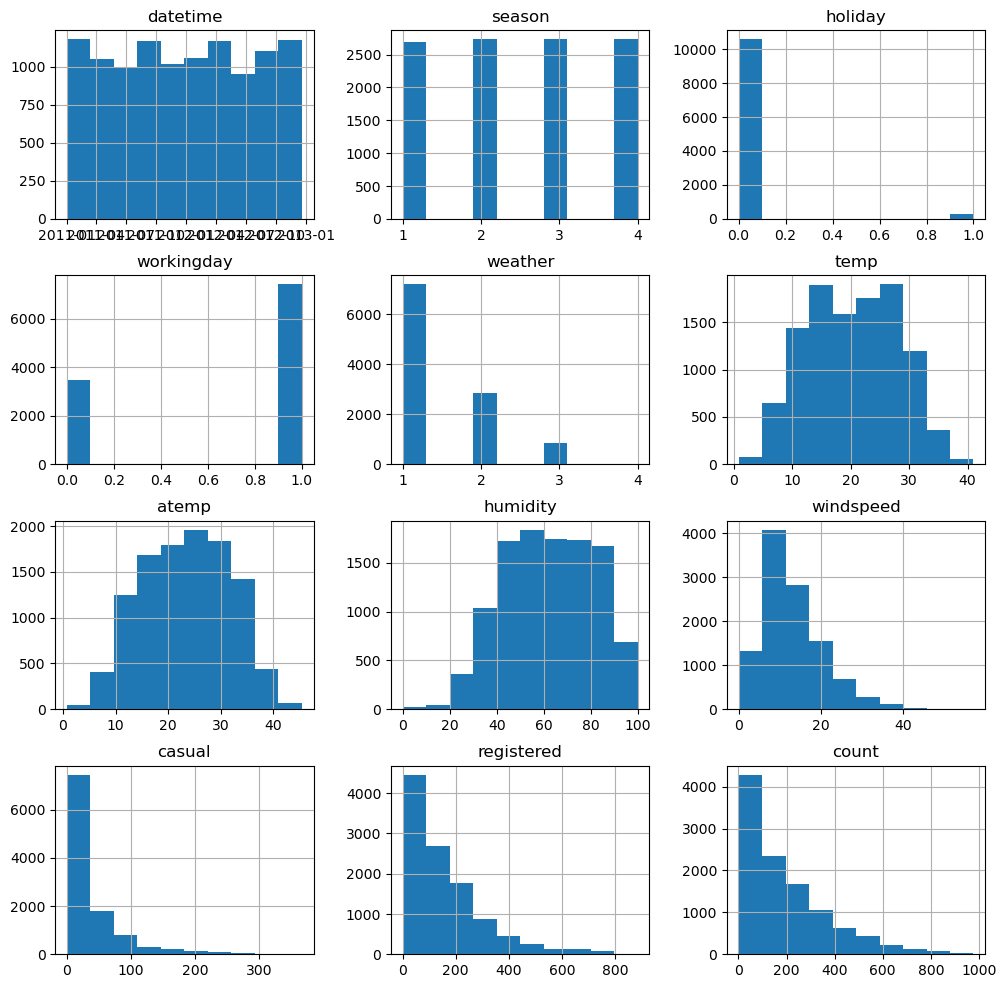

In [20]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(12,12))

In [10]:
# create a new feature

# Extracting features
train['hour'] = train['datetime'].dt.hour
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year
train['day_of_week'] = train['datetime'].dt.dayofweek
train['is_peak_hour'] = ((train['hour'].isin([7, 8, 9, 16, 17, 18])) & (train['day_of_week'] < 5)).astype(int)

# Extracting features
test['hour'] = test['datetime'].dt.hour
test['day_of_week'] = test['datetime'].dt.dayofweek
test['month'] = test['datetime'].dt.month
test['year'] = test['datetime'].dt.year
test['day_of_week'] = test['datetime'].dt.dayofweek
test['is_peak_hour'] = ((test['hour'].isin([7, 8, 9, 16, 17, 18])) & (test['day_of_week'] < 5)).astype(int)


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [11]:
# Convert "season" and "weather" columns to category type in train dataset
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')

# Convert "season" and "weather" columns to category type in test dataset
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [12]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year,day_of_week,is_peak_hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,5,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011,5,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011,5,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011,5,0


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'day_of_week'}>,
        <Axes: title={'center': 'is_peak_hour'}>, <Axes: >]], dtype=object)

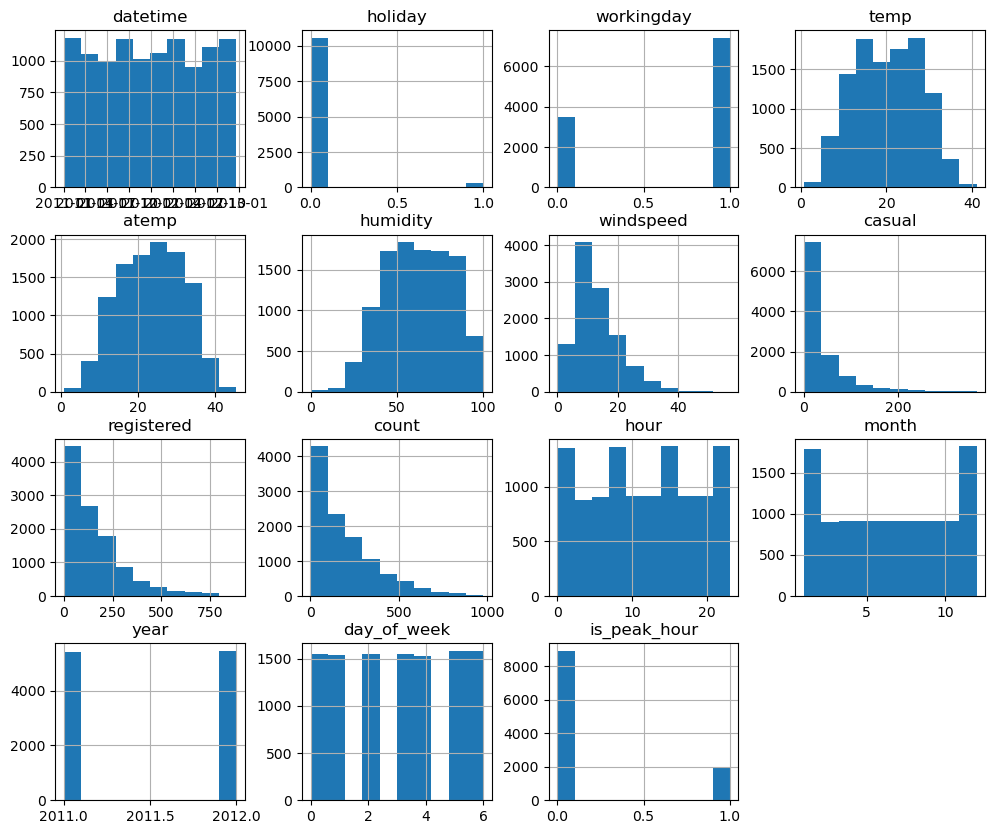

In [28]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(12, 10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [35]:
predictor_new_features = TabularPredictor(label='count',learner_kwargs={"ignored_columns": ["datetime","casual", "registered"]} ,eval_metric='root_mean_squared_error')

predictor_new_features.fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240512_190955"
Presets specified: ['best_quality']
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240512_190955"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   21.25 GB / 32.20 GB (66.0%)
Train Data Rows:    10886
Train Data Columns: 16
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/u

[1000]	valid_set's rmse: 36.708
[2000]	valid_set's rmse: 36.0559
[3000]	valid_set's rmse: 35.972
[1000]	valid_set's rmse: 36.5967
[2000]	valid_set's rmse: 35.7833
[3000]	valid_set's rmse: 35.5157
[4000]	valid_set's rmse: 35.4301
[5000]	valid_set's rmse: 35.4855
[1000]	valid_set's rmse: 36.6027
[2000]	valid_set's rmse: 35.92
[3000]	valid_set's rmse: 35.7069
[4000]	valid_set's rmse: 35.7298
[1000]	valid_set's rmse: 39.3963
[2000]	valid_set's rmse: 38.3885
[3000]	valid_set's rmse: 38.1836
[1000]	valid_set's rmse: 39.3207
[2000]	valid_set's rmse: 38.0161
[3000]	valid_set's rmse: 37.8024
[4000]	valid_set's rmse: 37.7071
[5000]	valid_set's rmse: 37.6377
[1000]	valid_set's rmse: 36.0108
[2000]	valid_set's rmse: 34.97
[3000]	valid_set's rmse: 34.6785
[4000]	valid_set's rmse: 34.4926
[5000]	valid_set's rmse: 34.479
[6000]	valid_set's rmse: 34.4331
[7000]	valid_set's rmse: 34.4486
[8000]	valid_set's rmse: 34.4746
[1000]	valid_set's rmse: 41.155
[2000]	valid_set's rmse: 40.759
[3000]	valid_set's 

	-36.5767	 = Validation score   (-root_mean_squared_error)
	47.19s	 = Training   runtime
	7.8s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 337.18s of the 537.23s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 35.5759
[1000]	valid_set's rmse: 34.3676
[1000]	valid_set's rmse: 35.221
[2000]	valid_set's rmse: 34.5546
[3000]	valid_set's rmse: 34.3647
[4000]	valid_set's rmse: 34.3097
[1000]	valid_set's rmse: 37.8359
[2000]	valid_set's rmse: 37.5894
[1000]	valid_set's rmse: 38.2185
[2000]	valid_set's rmse: 38.1186
[1000]	valid_set's rmse: 32.3734
[2000]	valid_set's rmse: 31.9105
[1000]	valid_set's rmse: 40.9758
[1000]	valid_set's rmse: 34.6971
[2000]	valid_set's rmse: 34.588


	-35.9329	 = Validation score   (-root_mean_squared_error)
	23.54s	 = Training   runtime
	2.74s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 307.53s of the 507.58s of remaining time.
	-40.0805	 = Validation score   (-root_mean_squared_error)
	13.8s	 = Training   runtime
	0.7s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 292.55s of the 492.6s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2751.
	Ran out of time, early stopping on iteration 2876.
	Ran out of time, early stopping on iteration 2907.
	Ran out of time, early stopping on iteration 3117.
	Ran out of time, early stopping on iteration 3133.
	Ran out of time, early stopping on iteration 3563.
	Ran out of time, early stopping on iteration 3568.
	Ran out of time, early stopping on iteration 3991.
	-35.59	 = Validation score   (-root_mean_squared_er

In [36]:
summary = predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -34.374377      12.043485  373.145459                0.000989           0.588373            2       True          9
1      WeightedEnsemble_L3  -34.465507      14.678763  561.211424                0.000884           0.481522            3       True         17
2     ExtraTreesMSE_BAG_L2  -34.842840      13.455736  388.455310                0.854667          13.423493            2       True         14
3   NeuralNetFastAI_BAG_L2  -34.904917      12.883449  434.052429                0.282381          59.020611            2       True         15
4          CatBoost_BAG_L2  -34.911104      12.670435  438.031667                0.069366          62.999850            2       True         13
5          LightGBM_BAG_L2  -35.032193      12.709385  383.922171         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [37]:
# Generate the leaderboard
leaderboard = predictor_new_features.leaderboard()

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -34.374377      12.043485  373.145459                0.000989           0.588373            2       True          9
1      WeightedEnsemble_L3  -34.465507      14.678763  561.211424                0.000884           0.481522            3       True         17
2     ExtraTreesMSE_BAG_L2  -34.842840      13.455736  388.455310                0.854667          13.423493            2       True         14
3   NeuralNetFastAI_BAG_L2  -34.904917      12.883449  434.052429                0.282381          59.020611            2       True         15
4          CatBoost_BAG_L2  -34.911104      12.670435  438.031667                0.069366          62.999850            2       True         13
5          LightGBM_BAG_L2  -35.032193      12.709385  383.922171                0.108317           8.890353            2       True    

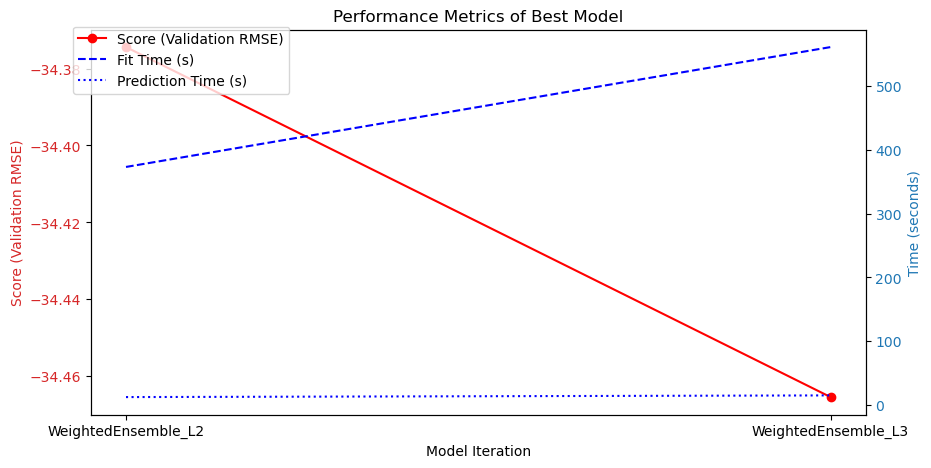

In [36]:
import matplotlib.pyplot as plt

# Data for the best model 'WeightedEnsemble_L2'
models = ['WeightedEnsemble_L2',"WeightedEnsemble_L3"] 
scores = [-34.374377,-34.465507]  
fit_times = [373.145459,561.211424]  
pred_times = [12.043485,14.678763]  

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

# line chart for score
ax1.set_xlabel('Model Iteration')
ax1.set_ylabel('Score (Validation RMSE)', color='tab:red')
ax1.plot(models, scores, 'r-o', label='Score (Validation RMSE)')
ax1.tick_params(axis='y', labelcolor='tab:red')

# plot training and prediction time
ax2 = ax1.twinx()
ax2.set_ylabel('Time (seconds)', color='tab:blue')
ax2.plot(models, fit_times, 'b--', label='Fit Time (s)')
ax2.plot(models, pred_times, 'b:', label='Prediction Time (s)')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.title('Performance Metrics of Best Model')
plt.show()


In [39]:
predicted_new_features = predictor_new_features.predict(test)

In [40]:
(predicted_new_features<0).sum()

72

In [41]:
# Remember to set all negative values to zero
predicted_new_features[predicted_new_features<0] = 0

In [42]:
predicted_new_features

0        15.520744
1         4.747102
2         2.279107
3         2.444465
4         1.994124
           ...    
6488    313.073853
6489    210.566742
6490    156.228394
6491    101.046661
6492     58.401920
Name: count, Length: 6493, dtype: float32

In [43]:
# Same submitting predictions
submission_new_features = pd.read_csv('data/sampleSubmission.csv',parse_dates=['datetime'])
submission_new_features["count"] = predicted_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [44]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 746kB/s]
Successfully submitted to Bike Sharing Demand

In [45]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-12 19:20:50  new features                               pending                              
submission.csv               2024-05-12 19:09:07  raw_submission1_12-05-2024                 complete  1.80721      1.80721       
submission_new_hpo.csv       2024-05-12 16:28:50  new features with hyperparameters          complete  1.80274      1.80274       
submission_new_hpo.csv       2024-05-12 16:18:23  new features with hyperparameters          complete  1.80274      1.80274       


#### New Score of `0.51901`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [17]:
from autogluon.core import space


num_trials = 5
search_strategy = 'auto'
hyperparameters = {
    'GBM': [
        {'num_boost_round': 100, 'max_depth': 5},
        {'num_boost_round': 200, 'max_depth': 9}
    ],
    'KNN': [
        {'n_neighbors': 5},
        {'n_neighbors': 10}
    ]
}
predictor_new_hpo = TabularPredictor(
        label="count", 
        problem_type="regression", 
        eval_metric="root_mean_squared_error", 
        learner_kwargs={"ignored_columns": ["casual", "registered",'datetime']}
    ).fit(
        train_data=train, time_limit=600, presets="best_quality",hyperparameters=hyperparameters
)


No path specified. Models will be saved in: "AutogluonModels/ag-20240512_225208"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240512_225208"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   16.18 GB / 32.20 GB (50.2%)
Train Data Rows:    10886
Train Data Columns: 16
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess the data

In [18]:
predictor_new_hpo.fit_summary()


*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBM_2_BAG_L2  -38.348396       8.047995  180.003387                2.396460          70.964143            2       True          7
1  WeightedEnsemble_L3  -38.348396       8.048529  180.119789                0.000534           0.116402            3       True          8
2      LightGBM_BAG_L2  -38.566152       7.345239  161.100703                1.693704          52.061458            2       True          6
3    LightGBM_2_BAG_L1  -38.730404       3.549371   62.469731                3.549371          62.469731            1       True          4
4  WeightedEnsemble_L2  -38.730404       3.549929   62.657234                0.000558           0.187503            2       True          5
5      LightGBM_BAG_L1  -50.034113       1.755737   46.520727                1.755737          46.

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighbors_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighbors_2_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_2_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_2_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighbors_BAG_L1': -115.73323148534313,
  'KNeighbors_2_BAG_L1': -116.57621464153583,
  'LightGBM_BAG_L1': -50.034113431416,
  'LightGBM_2_BAG_L1': -38.73040358458379,
  'WeightedEnsemble_L2': -38.73040358458379,
  'LightGBM_BAG_L2': -38.566152042646195,
  'LightGBM_2_BAG_L2': -38.34839577121802,
  'WeightedEnsemble_L3': -38.34839577121802},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighbors_BAG_L1': ['KNeighbors_BAG_L1'],
  'KNeighbors_2_BAG_L1': ['KNeighbors_2_BAG_L1'],
  'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'LightGBM_2_BAG_L1

In [19]:
leaderboard = predictor_new_hpo.leaderboard()

                 model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBM_2_BAG_L2  -38.348396       8.047995  180.003387                2.396460          70.964143            2       True          7
1  WeightedEnsemble_L3  -38.348396       8.048529  180.119789                0.000534           0.116402            3       True          8
2      LightGBM_BAG_L2  -38.566152       7.345239  161.100703                1.693704          52.061458            2       True          6
3    LightGBM_2_BAG_L1  -38.730404       3.549371   62.469731                3.549371          62.469731            1       True          4
4  WeightedEnsemble_L2  -38.730404       3.549929   62.657234                0.000558           0.187503            2       True          5
5      LightGBM_BAG_L1  -50.034113       1.755737   46.520727                1.755737          46.520727            1       True          3
6    KNeighbors_BAG_

In [20]:
predictor_new_hpo = predictor_new_hpo.predict(test)

In [21]:
predictor_new_hpo[predictor_new_hpo < 0] = 0

In [22]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('submission.csv')
submission_new_hpo["count"] = predictor_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [25]:
#I just submitted multiple times the last one that's showing pending is the same as the one before it (I wanted to display the score)
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 668kB/s]
Successfully submitted to Bike Sharing Demand

In [26]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-12 22:58:00  new features with hyperparameters          pending                              
submission_new_hpo.csv       2024-05-12 22:57:31  new features with hyperparameters          complete  0.48045      0.48045       
submission_new_hpo.csv       2024-05-12 20:19:21  last new features with hyperparameters     complete  0.44409      0.44409       
submission_new_hpo.csv       2024-05-12 20:14:39  new features with hyperparameters          complete  0.44409      0.44409       


#### New Score of `0.48045`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

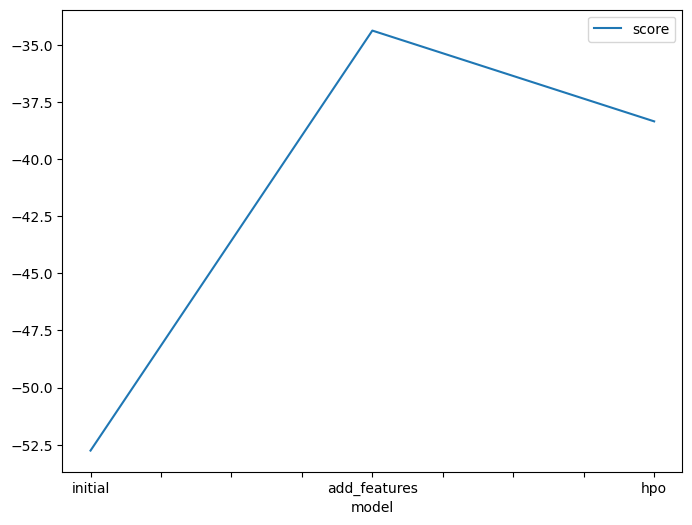

In [27]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.760495, -34.374377, -38.348396]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

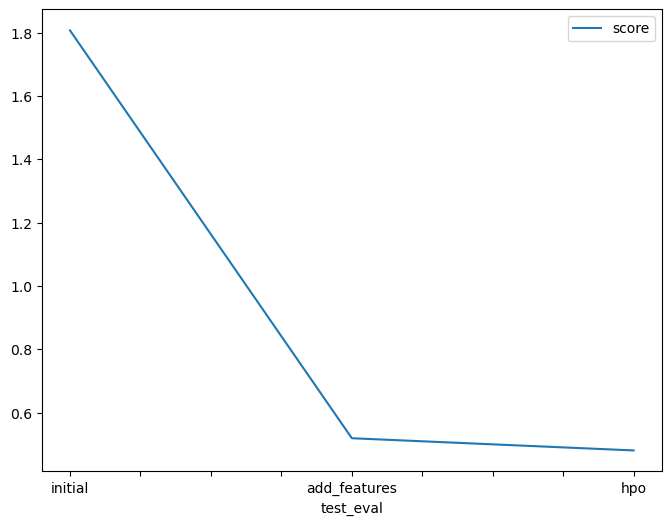

In [28]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.8072,0.51901 ,0.48045 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [29]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "time_limit": [600, 600, 600],#had to keep them the same to be able to truly compare the other chan
    "eval_metric": ['rmse', 'rmse', 'rmse'],
    "hyper_param_process": ['default', 'default', 'tuned'],
    "score": [1.8072,0.51901 ,0.48045 ]
})

,model,time_limit,eval_metric,hyper_param_process,score
0,initial,600,rmse,default,1.80720
1,add_features,600,rmse,default,0.51901
2,hpo,600,rmse,tuned,0.48045
